In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
peru_taxi = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-korneeva-25/Karpov_courses/Py/3_taxi_peru.csv'
, sep=";", parse_dates=['start_at', 'end_at', 'arrived_at'])

In [37]:
# Для будущего графика. Вообще мне нужны проценты:)
    
journey_count_peru = peru_taxi[['source', 'journey_id']] \
    .groupby(['source'], as_index=False) \
    .agg({'journey_id': 'count'}) \
    .sort_values('journey_id', ascending=False) \
    .reset_index() \
    .rename(columns={'journey_id': 'journey_count'}) 

In [38]:
journey_count_peru

,index,source,journey_count
0,3,iPhone,9741
1,4,web,7631
2,0,Android,4909
3,2,iPad,571
4,1,Wap,136


In [39]:
# Вариант 2, без преобразования колонок.
peru_taxi['source'].value_counts(normalize=True).round(2) * 100


iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

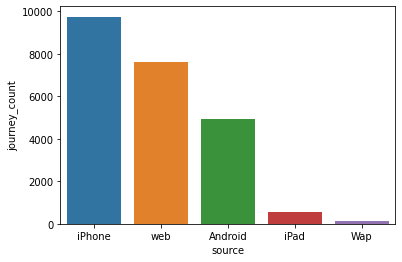

In [25]:
sns.barplot(x='source', y='journey_count', data=journey_count_peru)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


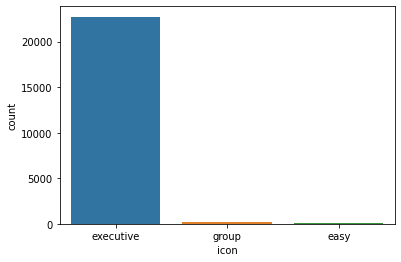

In [28]:
sns.countplot(peru_taxi['icon'])

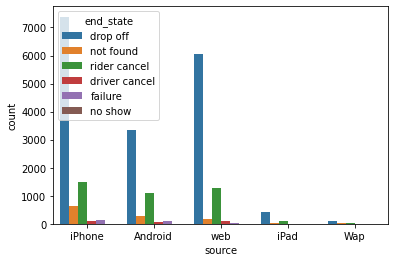

In [29]:
sns.countplot(x='source', hue='end_state', data=peru_taxi)

In [45]:
driver_score_counts = peru_taxi['driver_score'] \
    .value_counts(normalize=True) \
    .mul(100).round(2) \
    .reset_index() \
    .rename(columns={'driver_score': 'percentage', 'index': 'driver_score'}) \
    .sort_values('driver_score', ascending=True)

#mul() - метод умножения, удобен в цепочке методов

In [46]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


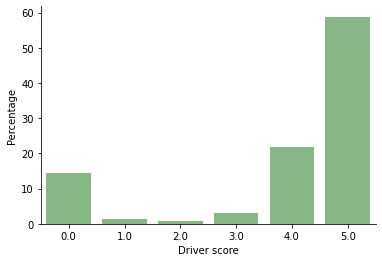

In [51]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='green', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [61]:
rider_score_counts = peru_taxi['rider_score'] \
    .value_counts(normalize=True) \
    .mul(100).round(2) \
    .reset_index() \
    .rename(columns={'rider_score': 'percentage', 'index': 'rider_score'}) \
    .sort_values('rider_score', ascending=True)

In [60]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


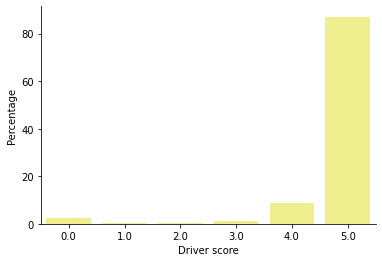

In [62]:
# Строим кошмар ручками:)

ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='yellow', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()